<a href="https://colab.research.google.com/github/miniact/mangyaWAF/blob/master/mms_waf_modeling_ml_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling and evaluation of machine learning model

Import all dependencies


In [5]:
cd D:\1MYFILES\ML_NGFW\FIREWALLS\mangyaWAF\models

D:\1MYFILES\ML_NGFW\FIREWALLS\mangyaWAF\models


In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import pickle
from IPython.display import display
#evaluations
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [7]:
data = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5ed2d4107c349c221194b608/5ed2d453f0e5a45bcd8cf16c/9d9eab0bcf8afdfbdff5fdb173f78cd6/final-allpayload.csv",index_col="index")
data

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
index,,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333,8.537499,6,0,0
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000,5.049752,7,0,1
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452,26.617263,18,0,1
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000,7.151423,7,0,1
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667,6.599663,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110355,needlessness,0.0,LEGAL,12,0,0,100,115,107.666667,6.209312,5,1,0
110356,Mary-Jo,0.0,LEGAL,7,0,1,45,121,91.285714,25.257046,7,0,0
110357,marshaled,0.0,LEGAL,9,0,0,97,115,105.000000,6.463573,8,0,0


Selecting dependent and independent variables

In [8]:
data = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5ed2d4107c349c221194b608/5ed2d453f0e5a45bcd8cf16c/9d9eab0bcf8afdfbdff5fdb173f78cd6/final-allpayload.csv",index_col="index")

Y = data['is_malicious']
"""independent_variables = data.columns
independent_variables = independent_variables.delete(1)
independent_variables"""
X = data.iloc[:,3:]
X


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
index,,,,,,,,,,
0,9,0,0,50,80,56.333333,8.537499,6,0,0
1,8,0,0,103,116,109.000000,5.049752,7,0,1
2,31,0,11,37,119,65.806452,26.617263,18,0,1
3,7,0,0,98,121,107.000000,7.151423,7,0,1
4,9,0,0,97,116,105.666667,6.599663,7,0,1
...,...,...,...,...,...,...,...,...,...,...
110355,12,0,0,100,115,107.666667,6.209312,5,1,0
110356,7,0,1,45,121,91.285714,25.257046,7,0,0
110357,9,0,0,97,115,105.000000,6.463573,8,0,0


# Modeling data with Xgboost Classifier

In [4]:
for i in range( 1 , 7 ) : 
    c = 100 / 7 
    c = c * i - 2.5
    print("{0:.3f}".format(c))
    c = 0 
    

11.786
26.071
40.357
54.643
68.929
83.214


In [16]:
dist=(
40.357,
54.643
)

for i in range(0 , len(dist)):
    mid = (dist[i] + dist[i + 1]) / 2 
    print("{0:.3f}".format(mid))

47.500


IndexError: tuple index out of range

In [15]:
import xgboost as xgb

In [16]:
#?xgb.XGBClassifier()
xgb_classifer = xgb.XGBClassifier()
xgb_classifer.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [17]:
%time xgb_classifer.fit(X,Y)

CPU times: total: 24.8 s
Wall time: 3.27 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [18]:
data['predicted_is_malicious'] = xgb_classifer.predict(X)

In [19]:
data.head(30)

,payload,is_malicious,injection_type,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords,predicted_is_malicious
index,,,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333,8.537499,6,0,0,0
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000,5.049752,7,0,1,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452,26.617263,18,0,1,1
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000,7.151423,7,0,1,0
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667,6.599663,7,0,1,0
5,lafleur,0.0,LEGAL,7,0,0,97,117,106.714286,6.670067,6,0,0,0
6,capturers,0.0,LEGAL,9,0,0,97,117,109.444444,7.558823,8,0,0,0
7,8nca58z48,0.0,LEGAL,9,0,0,52,122,77.888889,26.904954,7,0,0,0
8,autocratic,0.0,LEGAL,10,0,0,97,117,107.100000,8.117266,7,0,0,0


In [20]:
data[["is_malicious","predicted_is_malicious"]]

,is_malicious,predicted_is_malicious
index,,
0,0.0,0
1,0.0,0
2,1.0,1
3,0.0,0
4,0.0,0
...,...,...
110355,0.0,0
110356,0.0,0
110357,0.0,0


# Other Models 
 - AdaBoost
 - SGD classifier 
 - MultiLayerPerceptron classifier
 - Logistic Regression
 - Support Vector Machine
 - Random forest
 - Decision Tree
 - Multinomial Naive Bayes

In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()

from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier() 

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter = 110359) 

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier() 

from sklearn.svm import SVC
svm_classifier = SVC() 

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier() 

from sklearn.naive_bayes import MultinomialNB
mnb_classifier = MultinomialNB() 

In [39]:
data = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5ed2d4107c349c221194b608/5ed2d453f0e5a45bcd8cf16c/9d9eab0bcf8afdfbdff5fdb173f78cd6/final-allpayload.csv",index_col="index")

In [40]:
Y = data['is_malicious']
"""independent_variables = data.columns
independent_variables = independent_variables.delete(1)
independent_variables"""
X = data.iloc[:,3:]

In [41]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [42]:
xgb_classifier.fit(X,Y)
ada_classifier.fit(X,Y)
sgd_classifier.fit(X,Y)
lr_classifier.fit(X,Y)
rf_classifier.fit(X,Y)
svm_classifier.fit(X,Y)
dt_classifier.fit(X,Y)
mnb_classifier.fit(X,Y)

MultinomialNB()

# PERFORMANCE EVALUATION

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def classification_Report( model ) : 
    print('Training Accuracy :',model.score(trainX,trainY))
    print('Testing Accuracy :',model.score(testX,testY))
    con_mat = pd.DataFrame(confusion_matrix(model.predict(testX), testY),
                columns = ['Predicted:Bad', 'Predicted:Good'],
                index = ['Actual:Bad', 'Actual:Good'])


    print('\nCLASSIFICATION REPORT\n')
    print(classification_report(model.predict(testX), testY,
                                target_names =['Bad','Good']))

    print('\nCONFUSION MATRIX')
#     plt.figure(figsize= (6,4))
    # sb.heatmap(con_mat, annot = True,fmt='d')

In [73]:
classification_Report( xgb_classifier )

Training Accuracy : 0.999580902758113
Testing Accuracy : 0.9996375498368975

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     20200
        Good       1.00      1.00      1.00      1872

    accuracy                           1.00     22072
   macro avg       1.00      1.00      1.00     22072
weighted avg       1.00      1.00      1.00     22072


CONFUSION MATRIX


In [74]:
classification_Report(ada_classifier)

Training Accuracy : 0.986724811689415
Testing Accuracy : 0.9879938383472272

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99     20269
        Good       0.91      0.95      0.93      1803

    accuracy                           0.99     22072
   macro avg       0.95      0.97      0.96     22072
weighted avg       0.99      0.99      0.99     22072


CONFUSION MATRIX


In [81]:
sgd_classifier.fit( X , Y )

SGDClassifier()

In [82]:
classification_Report(sgd_classifier)

Training Accuracy : 0.9789885031432293
Testing Accuracy : 0.9800652410293584

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      0.98      0.99     20582
        Good       0.78      0.98      0.87      1490

    accuracy                           0.98     22072
   macro avg       0.89      0.98      0.93     22072
weighted avg       0.98      0.98      0.98     22072


CONFUSION MATRIX


In [76]:
classification_Report(lr_classifier)

Training Accuracy : 0.9827943591776632
Testing Accuracy : 0.9833725987676695

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99     20399
        Good       0.85      0.95      0.90      1673

    accuracy                           0.98     22072
   macro avg       0.92      0.97      0.94     22072
weighted avg       0.98      0.98      0.98     22072


CONFUSION MATRIX


In [77]:
classification_Report(rf_classifier)

Training Accuracy : 0.9999660191425497
Testing Accuracy : 1.0

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     20198
        Good       1.00      1.00      1.00      1874

    accuracy                           1.00     22072
   macro avg       1.00      1.00      1.00     22072
weighted avg       1.00      1.00      1.00     22072


CONFUSION MATRIX


In [78]:
classification_Report(svm_classifier)

Training Accuracy : 0.9858639633006739
Testing Accuracy : 0.9862722000724901

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      0.99      0.99     20461
        Good       0.85      0.99      0.91      1611

    accuracy                           0.99     22072
   macro avg       0.92      0.99      0.95     22072
weighted avg       0.99      0.99      0.99     22072


CONFUSION MATRIX


In [79]:
classification_Report(dt_classifier)

Training Accuracy : 0.9999660191425497
Testing Accuracy : 1.0

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     20198
        Good       1.00      1.00      1.00      1874

    accuracy                           1.00     22072
   macro avg       1.00      1.00      1.00     22072
weighted avg       1.00      1.00      1.00     22072


CONFUSION MATRIX


In [80]:
classification_Report(mnb_classifier)

Training Accuracy : 0.9244152460780427
Testing Accuracy : 0.9262866980790141

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.99      0.96     18945
        Good       0.90      0.54      0.67      3127

    accuracy                           0.93     22072
   macro avg       0.91      0.76      0.82     22072
weighted avg       0.92      0.93      0.92     22072


CONFUSION MATRIX


# Storing the trained model into pickel file
to skip the training step all time and directly load trained data from file

In [48]:
# Training with UNSPLIT data
pickle.dump(xgb_classifer,open("xgb_classifier_NT.pkl","wb"))
pickle.dump(ada_classifier,open("ada_classifier_NT.pkl","wb"))
pickle.dump(sgd_classifier,open("sgd_classifier_NT.pkl","wb"))
pickle.dump(lr_classifier,open("lr_classifier_NT.pkl","wb"))
pickle.dump(rf_classifier,open("rf_classifier_NT.pkl","wb"))
pickle.dump(svm_classifier,open("svm_classifier_NT.pkl","wb"))
pickle.dump(dt_classifier,open("dt_classifier_NT.pkl","wb"))
pickle.dump(mnb_classifier,open("mnb_classifier_NT.pkl","wb"))

In [53]:
# Training with SPLIT data 
pickle.dump(xgb_classifier,open("xgb_classifier.pkl","wb"))
pickle.dump(ada_classifier,open("ada_classifier.pkl","wb"))
pickle.dump(sgd_classifier,open("sgd_classifier.pkl","wb"))
pickle.dump(lr_classifier,open("lr_classifier.pkl","wb"))
pickle.dump(rf_classifier,open("rf_classifier.pkl","wb"))
pickle.dump(svm_classifier,open("svm_classifier.pkl","wb"))
pickle.dump(dt_classifier,open("dt_classifier.pkl","wb"))
pickle.dump(mnb_classifier,open("mnb_classifier.pkl","wb"))

In [22]:
#reading binary file

with open("xgb_classifier_NT.pkl","rb") as file : 
  xgb_classifer_pickle = pickle.load(file) 

In [23]:
#testing the model via pickle file
data['predicted_is_malicious_pickle'] = xgb_classifer_pickle.predict(X)
data[["is_malicious","predicted_is_malicious","predicted_is_malicious_pickle"]]

,is_malicious,predicted_is_malicious,predicted_is_malicious_pickle
index,,,
0,0.0,0,0
1,0.0,0,0
2,1.0,1,1
3,0.0,0,0
4,0.0,0,0
...,...,...,...
110355,0.0,0,0
110356,0.0,0,0
110357,0.0,0,0


Storing model with joblib



In [24]:
import joblib
joblib.dump(xgb_classifer,"xgb_classifier.joblib")


['xgb_classifier.joblib']

In [26]:
#prwediction via joblib
#testing the model via pickle file
xgb_classifer_joblib = joblib.load("xgb_classifier.joblib")
data['predicted_is_malicious_joblib'] = xgb_classifer_joblib.predict(X)
data[["is_malicious","predicted_is_malicious","predicted_is_malicious_joblib"]]

,is_malicious,predicted_is_malicious,predicted_is_malicious_joblib
index,,,
0,0.0,0,0
1,0.0,0,0
2,1.0,1,1
3,0.0,0,0
4,0.0,0,0
...,...,...,...
110355,0.0,0,0
110356,0.0,0,0
110357,0.0,0,0


In [24]:
count = 10 
def func() : 
    global count
    count=count + 1 

print(count)

10


# OPTIMIZING THE MODELS

In [9]:
                xgb_classifier = pickle.load(open("xgb_classifier.pkl", "rb")) 
                ada_classifier = pickle.load(open("ada_classifier.pkl", "rb")) 
                sgd_classifier = pickle.load(open("sgd_classifier.pkl", "rb")) 
                lr_classifier = pickle.load(open("lr_classifier.pkl", "rb")) 
                rf_classifier = pickle.load(open("rf_classifier.pkl", "rb")) 
                svm_classifier = pickle.load(open("svm_classifier.pkl", "rb")) 
                dt_classifier = pickle.load(open("dt_classifier.pkl", "rb")) 
                mnb_classifier = pickle.load(open("mnb_classifier.pkl", "rb")) 

In [7]:
data = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5ed2d4107c349c221194b608/5ed2d453f0e5a45bcd8cf16c/9d9eab0bcf8afdfbdff5fdb173f78cd6/final-allpayload.csv",index_col="index")

Y = data['is_malicious']
"""independent_variables = data.columns
independent_variables = independent_variables.delete(1)
independent_variables"""
X = data.iloc[:,3:]

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [84]:
print( 'LR train roc-auc : ',roc_auc_score(trainY,y_train_pred))
print( 'LR test roc-auc : ',roc_auc_score(testY,y_test_pred[:,1]))


LR train roc-auc :  0.9903174087319391
LR test roc-auc :  0.9894115926838815


In [13]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [14]:
pred=[]
for model in [lr_classifier]:
    pred.append(pd.Series(model.predict_proba(testX)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print(' test roc-auc: {}'.format(roc_auc_score(testY,final_prediction)))
fpr, tpr, thresholds = roc_curve(testY, final_prediction)


 test roc-auc: 0.9911740731406881


In [17]:
for i in pred : 
    print( i )

0        4.816033e-11
1        2.990401e-11
2        6.167603e-11
3        1.450673e-10
4        9.019539e-01
             ...     
22067    1.846403e-06
22068    7.538214e-11
22069    2.177200e-03
22070    2.486957e-11
22071    4.976889e-02
Length: 22072, dtype: float64


In [31]:
# for i in fpr : 
#     print( i )
for i in range( 0 , len(fpr)) : 
    print(i," ", fpr[i])

0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
5   0.0
6   0.0
7   0.0
8   0.0
9   0.0
10   0.0
11   0.0
12   4.976114649681529e-05
13   4.976114649681529e-05
14   4.976114649681529e-05
15   4.976114649681529e-05
16   4.976114649681529e-05
17   4.976114649681529e-05
18   4.976114649681529e-05
19   4.976114649681529e-05
20   4.976114649681529e-05
21   4.976114649681529e-05
22   4.976114649681529e-05
23   4.976114649681529e-05
24   4.976114649681529e-05
25   4.976114649681529e-05
26   4.976114649681529e-05
27   4.976114649681529e-05
28   4.976114649681529e-05
29   4.976114649681529e-05
30   4.976114649681529e-05
31   4.976114649681529e-05
32   4.976114649681529e-05
33   4.976114649681529e-05
34   9.952229299363058e-05
35   9.952229299363058e-05
36   0.00014928343949044585
37   0.00014928343949044585
38   0.00019904458598726116
39   0.00019904458598726116
40   0.00024880573248407643
41   0.00024880573248407643
42   0.0002985668789808917
43   0.0002985668789808917
44   0.0002985668789808917
45   

In [112]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(testY, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

,thresholds,accuracy
182,0.475147,0.981515
180,0.477047,0.981515
178,0.478660,0.981515
179,0.477397,0.981470
186,0.469330,0.981470
184,0.472678,0.981470
183,0.473957,0.981470
181,0.476941,0.981470
177,0.480447,0.981470
168,0.495019,0.981424


In [114]:
accuracy_ls.head(50)

,thresholds,accuracy
182,0.475147,0.981515
180,0.477047,0.981515
178,0.478660,0.981515
179,0.477397,0.981470
186,0.469330,0.981470
184,0.472678,0.981470
183,0.473957,0.981470
181,0.476941,0.981470
177,0.480447,0.981470
168,0.495019,0.981424


### FINDING THRESHOLD & ACCURACY FOR INPUT MODEL  

In [30]:
def get_thresh_accu_df( model ) : 
    pred=[]
    # appending all the probabilities that are classified as bad url 
    pred.append(pd.Series(model.predict_proba(testX)[:,1]))
    # getting the mean probabilities of all the ensembling models for bad url 
    final_prediction=pd.concat(pred,axis=1).mean(axis=1)
    print(model,': test roc-auc: {}'.format(roc_auc_score(testY,final_prediction)))
    
    # passing the data & probabilites to get thresholds, fpr & tpr 
    fpr, tpr, thresholds = roc_curve(testY, final_prediction)
    print( model, ": ", fpr )
    from sklearn.metrics import accuracy_score
    accuracy_ls = []
    for thres in thresholds:
        # marking the bad url based on different threshold values available 
        y_pred = np.where(final_prediction>thres,1,0)
        # and finding the accuracy based on the thresholds 
        accuracy_ls.append(accuracy_score(testY, y_pred, normalize=True))

    accuracy_ls = pd.concat([pd.Series(fpr),pd.Series(tpr),pd.Series(thresholds), pd.Series(accuracy_ls)],axis = 1 ) 
    accuracy_ls.columns = ['fpr','tpr','thresholds', 'accuracy']
    accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
    return( accuracy_ls ) 

In [35]:
# Optimal threshold of every model in form of data frame containing threshold & accuracy 
lr_opth = get_thresh_accu_df( lr_classifier )
xgb_opth= get_thresh_accu_df( xgb_classifier )
ada_opth= get_thresh_accu_df( ada_classifier )
# sgd_opth= get_thresh_accu_df( sgd_classifier )
rf_opth= get_thresh_accu_df( rf_classifier )
svm_opth= get_thresh_accu_df( svm_classifier )
dt_opth= get_thresh_accu_df( dt_classifier )
mnb_opth= get_thresh_accu_df( mnb_classifier )


LogisticRegression(max_iter=110359) : test roc-auc: 0.9911740731406881
LogisticRegression(max_iter=110359) :  [0.         0.         0.         ... 0.99855736 0.99865685 1.        ]
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : test roc-auc: 0.9999990909306699
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
     

In [59]:
# from sklearn.linear_model import SGDClassifier
# sgd_classifier = SGDClassifier(loss='hinge')

In [60]:
# sgd_opth= get_thresh_accu_df( sgd_classifier )

AttributeError: probability estimates are not available for loss='hinge'

In [55]:
# from sklearn.linear_model import SGDClassifier
# sgd_opth= get_thresh_accu_df( SGDClassifier(loss='hinge',class_weight='balanced') )
from sklearn.svm import SVC
svm_classifier = SVC( probability = True )
svm_classifier.fit( X, Y ) 
# svm_opth= get_thresh_accu_df( svm_classifier )


SVC(probability=True)

In [56]:
svm_classifier = pickle.load(open("svm_classifier.pkl", "rb")) 

In [36]:
lr_opth.to_csv('lr_opt.csv')
# 0.4160420
xgb_opth.to_csv('xgb_opth.csv')
ada_opth.to_csv('ada_opth.csv')
rf_opth .to_csv('rf_opth.csv')
svm_opth.to_csv('svm_opth.csv')
dt_opth.to_csv('dt_opth.csv')
mnb_opth.to_csv('mnb_opth.csv')

In [54]:
xgb_opth.to_csv('xgb_opth.csv')

In [55]:
ada_opth.to_csv('ada_opth.csv')

In [56]:
rf_opth .to_csv('rf_opth.csv')

In [57]:
svm_opth.to_csv('svm_opth.csv')

In [58]:
dt_opth.to_csv('dt_opth.csv')

In [59]:
mnb_opth.to_csv('mnb_opth.csv')

In [34]:
pred=[]
for model in [lr_classifier]:
    pred.append(pd.Series(model.predict_proba(testX)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print(' test roc-auc: {}'.format(roc_auc_score(testY,final_prediction)))
fpr, tpr, thresholds = roc_curve(testY, final_prediction)
thresholds

 test roc-auc: 0.989407297401622


array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       9.43617369e-13, 1.74809408e-14, 6.17380502e-20])

In [32]:
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

actual_predict = lr_classifier.predict( testX )
actual_accuracy = lr_classifier.score( testX, testY ) 
actual_classification_report = classification_report( testY, actual_predict)

print( actual_predict,actual_accuracy,actual_classification_report, sep='\n' )

[0. 0. 0. ... 0. 0. 0.]
0.98273831098224
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     20096
         1.0       0.95      0.85      0.90      1976

    accuracy                           0.98     22072
   macro avg       0.97      0.92      0.94     22072
weighted avg       0.98      0.98      0.98     22072



In [60]:
df = lr_classifier.decision_function(testX) 

In [61]:
optresh = 0.3762

# Accuracy specific 
# 0.4160420

# opt fpr:tpr specific 
# 0.136
 
# precision-recall specific 
# 0.3762

In [62]:
desired_predict = []

# Iterate through each value of decision function output
# and if  decision score is > than Decision threshold then,
# append (1) to the empty list ( desired_prediction) else
# append (0).
for i in df:
    if i<optresh:
        desired_predict.append(0)
    else:
        desired_predict.append(1)

In [63]:
df = lr_classifier.decision_function(testX) 
optresh = 0.3762
desired_predict = []

# Iterate through each value of decision function output
# and if  decision score is > than Decision threshold then,
# append (1) to the empty list ( desired_prediction) else
# append (0).
for i in df:
    if i<optresh:
        desired_predict.append(0)
    else:
        desired_predict.append(1)
y_pred = lr_classifier.predict( testX ) 
print("old precision value:", precision_score(testY, y_pred))

print("new precision value:", precision_score(testY, desired_predict))

old precision value: 0.9538986909504837
new precision value: 0.9717887154861945


In [64]:
accuracy_score( testY , y_pred )

0.98273831098224

In [65]:
accuracy_score( testY , desired_predict ) 

0.98169626676332

In [ ]:
# Precision aimed threshold 

# optimal balance fpr:tpr threshold 

# Accuracy aimed threshold

# what are roc-auc scores 
# how are they related to accuracy fpr tpr etc...,

# Main aim is to reduce the FPR  
# how threatening is FPR 
# what is the initial FPR 
# what is the FPR after applying the result 

# BUILDING ROC CURVE

In [11]:
!pip install plotnine 

  Using cached tzdata-2022.6-py2.py3-none-any.whl (338 kB)


In [53]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data simulation
from sklearn.datasets import make_classification     # Create a synthetic dataframe
from sklearn.linear_model import LogisticRegression  # Classification model
from sklearn.model_selection import train_test_split # Split the dataframe
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score
# Import module for data visualization
from plotnine import *
import plotnine

In [54]:
fpr, tpr, thresholds = roc_curve( testY,y_pred ) 

In [55]:
roc_df = pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})
len(roc_df )

1427

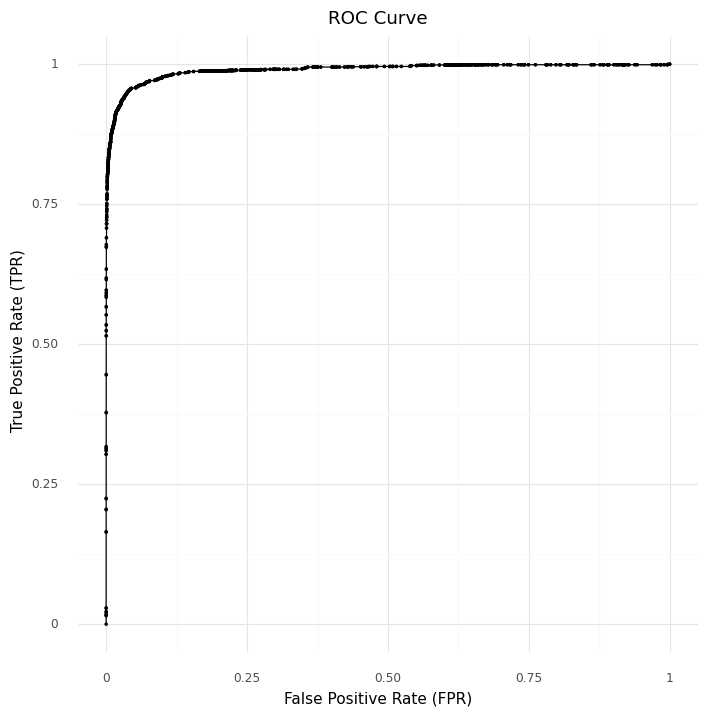

<ggplot: (190450228499)>

In [56]:
plotnine.options.figure_size = (8,8)
(
    ggplot(data = roc_df)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)
# GRAPH PLOT FOR EVERY INDIVIDUAL THRESHOLD VALUE 

## ROC CURVE USING G-MEAN

In [60]:
tpr 

array([0.        , 0.01488706, 0.0164271 , ..., 1.        , 1.        ,
       1.        ])

In [61]:
fpr 

array([0.        , 0.        , 0.        , ..., 0.99960246, 0.99970185,
       1.        ])

In [86]:
for i in thresholds : 
    print( i ) 

2.0
1.0
0.9999999999999998
0.9999999999999996
0.9999999999999993
0.9999999999999853
0.9999999999999836
0.9999999999993798
0.9999999999993745
0.9997675729236228
0.9997532591295469
0.9991610053538272
0.9990927144754994
0.9985711758077267
0.9985688328282138
0.9945701869684989
0.9944905118290219
0.9938753906246632
0.9938470641387951
0.9931561528996964
0.9931186864331139
0.9929983531519326
0.9929749006900235
0.9851667745486246
0.9849746749000983
0.9720753353503492
0.971981535971558
0.9505610055170708
0.9504601950386816
0.9466074028556967
0.9464838741009416
0.9425883514778067
0.9425455736917236
0.9345436983564702
0.934353333664504
0.9245846781047244
0.9240698941941605
0.9146615335108076
0.9141981897868316
0.9131281096116038
0.9129733688942024
0.9104377674889278
0.9096332559955014
0.9066471430342402
0.9065511678721137
0.8954411221321644
0.8953590186848002
0.8938419979084434
0.8935140175987671
0.881020253118786
0.8804846305707513
0.8501851980557613
0.8485287704788054
0.8478437709091092
0.84463

In [59]:
# getting the square root of specificity( 1 - fpr ) * sensitivity( tpr ) 
gmean = np.sqrt(tpr * (1-fpr))
gmean

array([0.        , 0.12201256, 0.12816827, ..., 0.01993829, 0.01726706,
       0.        ])

In [58]:

gmean = np.sqrt(tpr * (1-fpr))
fpr, tpr, thresholds = roc_curve( testY,y_pred ) 

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.136 with G-Mean: 0.9566
FPR: 0.04, TPR: 0.9533


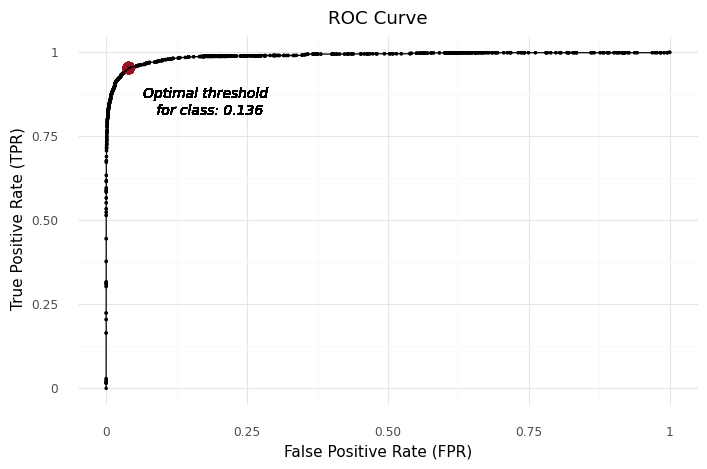

<ggplot: (190428129621)>

In [32]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = roc_df)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

# PlotnineError: 'geom_point layer expects a dataframe, but it got function instead.

## ROC USING Youden's J statistic

In [33]:
youdenJ = tpr - fpr

In [34]:
fpr, tpr, thresholds = roc_curve( testY,y_pred ) 

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.136 with Youden J statistic: 0.9566
FPR: 0.04, TPR: 0.9533


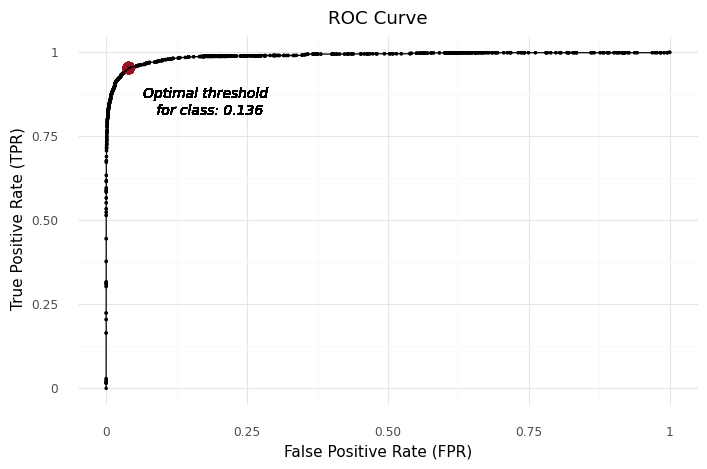

<ggplot: (190430718681)>

In [35]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = roc_df)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

threshold = probability threshold if thresholf = 0.5
then if a object is predicted to be 
what is this 0.136 
i need probability threshold to be set to optimal state 


## PRECISION - RECALL CURVE 

In [36]:
# Precision recall curve variables / parameters 
precision, recall, thresholds = precision_recall_curve(testY, y_pred)

In [37]:
precision_recall_df = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
precision_recall_df

,Precision,Recall,Threshold
0,0.088537,1.000000,1.886700e-12
1,0.088496,0.999487,1.911224e-12
2,0.088455,0.998973,1.936507e-12
3,0.088459,0.998973,1.989742e-12
4,0.088463,0.998973,2.093717e-12
...,...,...,...
21454,1.000000,0.018480,1.000000e+00
21455,1.000000,0.017967,1.000000e+00
21456,1.000000,0.016940,1.000000e+00
21457,1.000000,0.016427,1.000000e+00


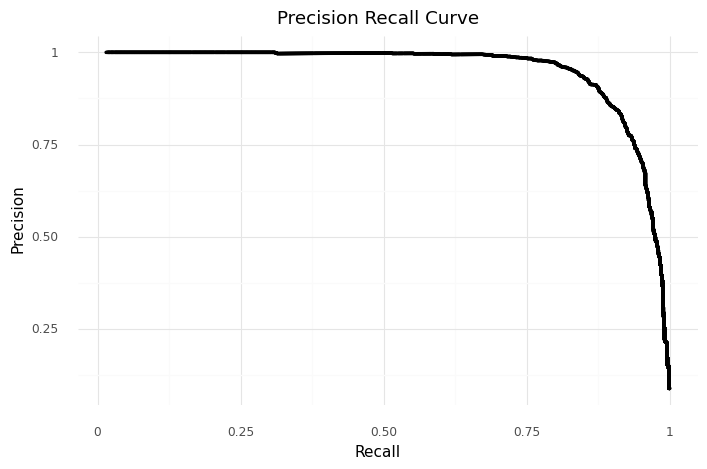

<ggplot: (190430287406)>

In [38]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = precision_recall_df)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    labs(title = 'Precision Recall Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

In [40]:
# f-score 
fscore = (2 * precision * recall) / (precision + recall)

In [41]:
fpr, tpr, thresholds = roc_curve( testY,y_pred ) 

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Best Threshold: 0.3762 with F-Score: 0.8911
Recall: 0.8717, Precision: 0.9114


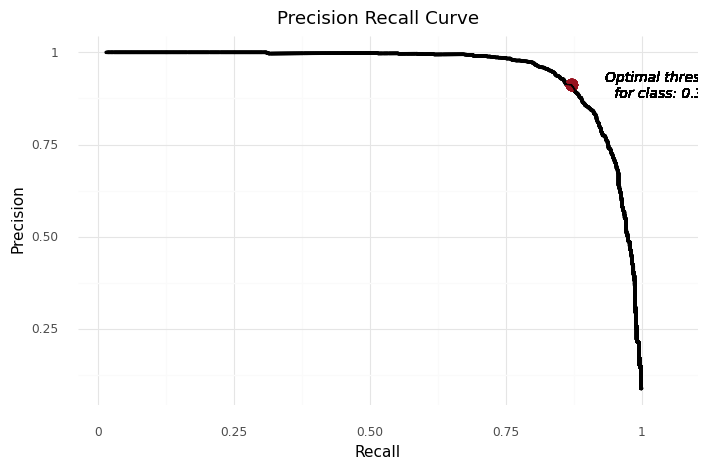

<ggplot: (190434176747)>

In [42]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = precision_recall_df)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = recallOpt,
                   y = precisionOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    # Annotate the text
    geom_text(aes(x = recallOpt,
                  y = precisionOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.18,
              nudge_y = 0,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'Precision Recall Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

# GFG PRE-RECALL

In [43]:
decision_function = lr_classifier.decision_function( testX ) 

In [130]:
len(decision_function)

22072

In [45]:
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

actual_predict = lr_classifier.predict( testX )
actual_accuracy = lr_classifier.score( testX, testY ) 
actual_classification_report = classification_report( testY, actual_predict)

print( actual_predict,actual_accuracy,actual_classification_report, sep='\n' )

[0. 0. 1. ... 0. 0. 0.]
0.9812432040594419
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     20124
         1.0       0.95      0.83      0.89      1948

    accuracy                           0.98     22072
   macro avg       0.97      0.91      0.94     22072
weighted avg       0.98      0.98      0.98     22072



Text(0.5, 1.0, 'Precision-Recall Curve')

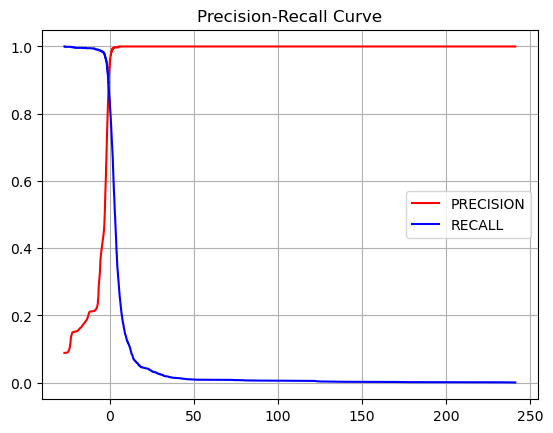

In [46]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(testY, decision_function)
  
# Plot the output.
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

# Integration with website


In [27]:
independent_variables=['length', 'non-printable','punctuation', 'min-byte', 'max-byte', 'mean-byte', 'std-byte','distinct-byte', 'sql-keywords', 'js-keywords']
independent_variables

['length',
 'non-printable',
 'punctuation',
 'min-byte',
 'max-byte',
 'mean-byte',
 'std-byte',
 'distinct-byte',
 'sql-keywords',
 'js-keywords']

In [ ]:
independent_variables=data.columns

sql_keywords = pd.read_csv('https://trello-attachments.s3.amazonaws.com/5ed2d4107c349c221194b608/5ed2d453f0e5a45bcd8cf16c/435e639346787ce2b495a16e9f690ef5/SQLKeywords.txt', index_col=False)
js_keywords = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5ed2d4107c349c221194b608/5ed2d453f0e5a45bcd8cf16c/dedc7eb9846a30c252cd950a0e2153d9/JavascriptKeywords.txt",index_col=False)
def calculate_features_and_predict(payload):
  features = {} 
  payload = str(payload)
  features['length'] = len(payload)
  features['non-printable'] = len([1 for letter in payload if letter not in string.printable])
  features['punctuation'] = len([1 for letter in payload if letter in string.punctuation])
  features['min-byte'] = min(bytearray(payload,'utf-8'))
  features['max-byte'] = max(bytearray(payload,'utf-8'))
  features['mean-byte'] = np.mean(bytearray(payload,'utf-8'))
  features['std-byte'] = np.std(bytearray(payload,'utf-8'))
  features['distinct-byte'] = len(set(bytearray(payload,'utf-8')))
  features['sql-keywords'] = len([1 for keyword in sql_keywords['Keyword'] if str(keyword).lower() in payload.lower()])
  features['js-keywords'] = len([1 for keyword in js_keywords['Keyword'] if str(keyword).lower() in payload.lower()])
  #payload_df = pd.DataFrame(data=features,index=[0],columns=independent_variables)
  payload_df = pd.DataFrame(features,index=[0])
  display(payload_df)
  result = xgb_classifer.predict(payload_df)
  #display(result)
  return result[0]


In [ ]:
calculate_features_and_predict("<>")

,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,26,0,8,40,116,93.461538,26.99463,13,0,1


array([1.])

1.0

In [ ]:
payload=''
while (payload != 'exit' ):
  payload = input("Enter payload")
  result = calculate_features_and_predict(payload)
  if(result > 0):
    print(f"Your payload {payload} is malicious - 403 error\n")
  else:
    print(f"Your payload {payload} is safe 200 OK\n")

Enter payload"><svg/onload=alert(1)>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,23,0,8,34,118,85.434783,29.09927,19,0,1


array([1.])

Your payload "><svg/onload=alert(1)> is malicious - 403 error

Enter payload"><img src=x onerror=alert(1)>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,30,0,8,32,120,87.0,30.626786,21,0,1


array([1.])

Your payload "><img src=x onerror=alert(1)> is malicious - 403 error

Enter payload"><script>alert(1)</script>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,27,0,9,34,116,87.962963,28.987202,16,0,1


array([1.])

Your payload "><script>alert(1)</script> is malicious - 403 error

Enter payload<marquee width=1 loop=1 onbounce=alert(1)>XSS</marquee>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,55,0,10,32,119,89.727273,27.301984,27,1,1


array([1.])

Your payload <marquee width=1 loop=1 onbounce=alert(1)>XSS</marquee> is malicious - 403 error

Enter payload<video oncanplaythrough=alert(1)><source src="validvideo.mp4" type="video/mp4"></video>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,87,0,18,32,121,91.609195,28.154074,29,3,1


array([1.])

Your payload <video oncanplaythrough=alert(1)><source src="validvideo.mp4" type="video/mp4"></video> is malicious - 403 error

Enter payload<a id=x tabindex=1 onfocus=alert(1)></a>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,40,0,10,32,120,85.4,29.031707,23,1,3


array([1.])

Your payload <a id=x tabindex=1 onfocus=alert(1)></a> is malicious - 403 error

Enter payload<image src=validimage.png onloadstart=alert(1)>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,47,0,7,32,118,94.170213,25.080567,23,2,2


array([1.])

Your payload <image src=validimage.png onloadstart=alert(1)> is malicious - 403 error

Enter payload<a onbeforecopy="alert(1)" contenteditable>test</a>


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,51,0,10,32,121,91.607843,27.368279,24,2,2


array([1.])

Your payload <a onbeforecopy="alert(1)" contenteditable>test</a> is malicious - 403 error

Enter payloadsqli'or1=1--


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,12,0,4,39,115,79.5,31.951787,10,0,0


array([1.])

Your payload sqli'or1=1-- is malicious - 403 error

Enter payloadsql'='OR'


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,9,0,4,39,115,75.0,30.335165,7,0,0


array([1.])

Your payload sql'='OR' is malicious - 403 error

Enter payloadcmd;cat a.txt


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,13,0,2,32,120,92.769231,27.470694,9,0,0


array([0.])

Your payload cmd;cat a.txt is safe 200 OK

Enter payloadcmd;cat /etc/hosts


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,18,0,3,32,116,93.444444,26.45588,12,0,0


array([0.])

Your payload cmd;cat /etc/hosts is safe 200 OK

Enter payload;wget


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,5,0,1,59,119,99.6,21.481155,5,0,0


array([0.])

Your payload ;wget is safe 200 OK

Enter payload;wget 127.0.0


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,13,0,3,32,119,67.076923,29.361046,11,0,0


array([0.])

Your payload ;wget 127.0.0 is safe 200 OK

Enter payloadexit


,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-byte,sql-keywords,js-keywords
0,4,0,0,101,120,110.5,7.762087,4,0,0


array([0.])

Your payload exit is safe 200 OK

